# Lab 5
# Decision Trees
## Submitted to: Prof. Sweetlin Hemlatha
## Submitted by: Prateek Singh (15BCE1091)

In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [5]:
red_wine_data = pd.read_csv('../Dataset/winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('../Dataset/winequality-white.csv', sep=';')

wine_data = pd.concat([red_wine_data, white_wine_data])
bins = (2, 6.5, 10)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)
wine_data.iloc[:, :11].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [6]:
scaler = StandardScaler()

data = wine_data.iloc[:,:11].values
scaled_features = scaler.fit_transform(data)

wine_data_scaled = pd.DataFrame(scaled_features, index=wine_data.index, columns=wine_data.columns[:11])
wine_data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


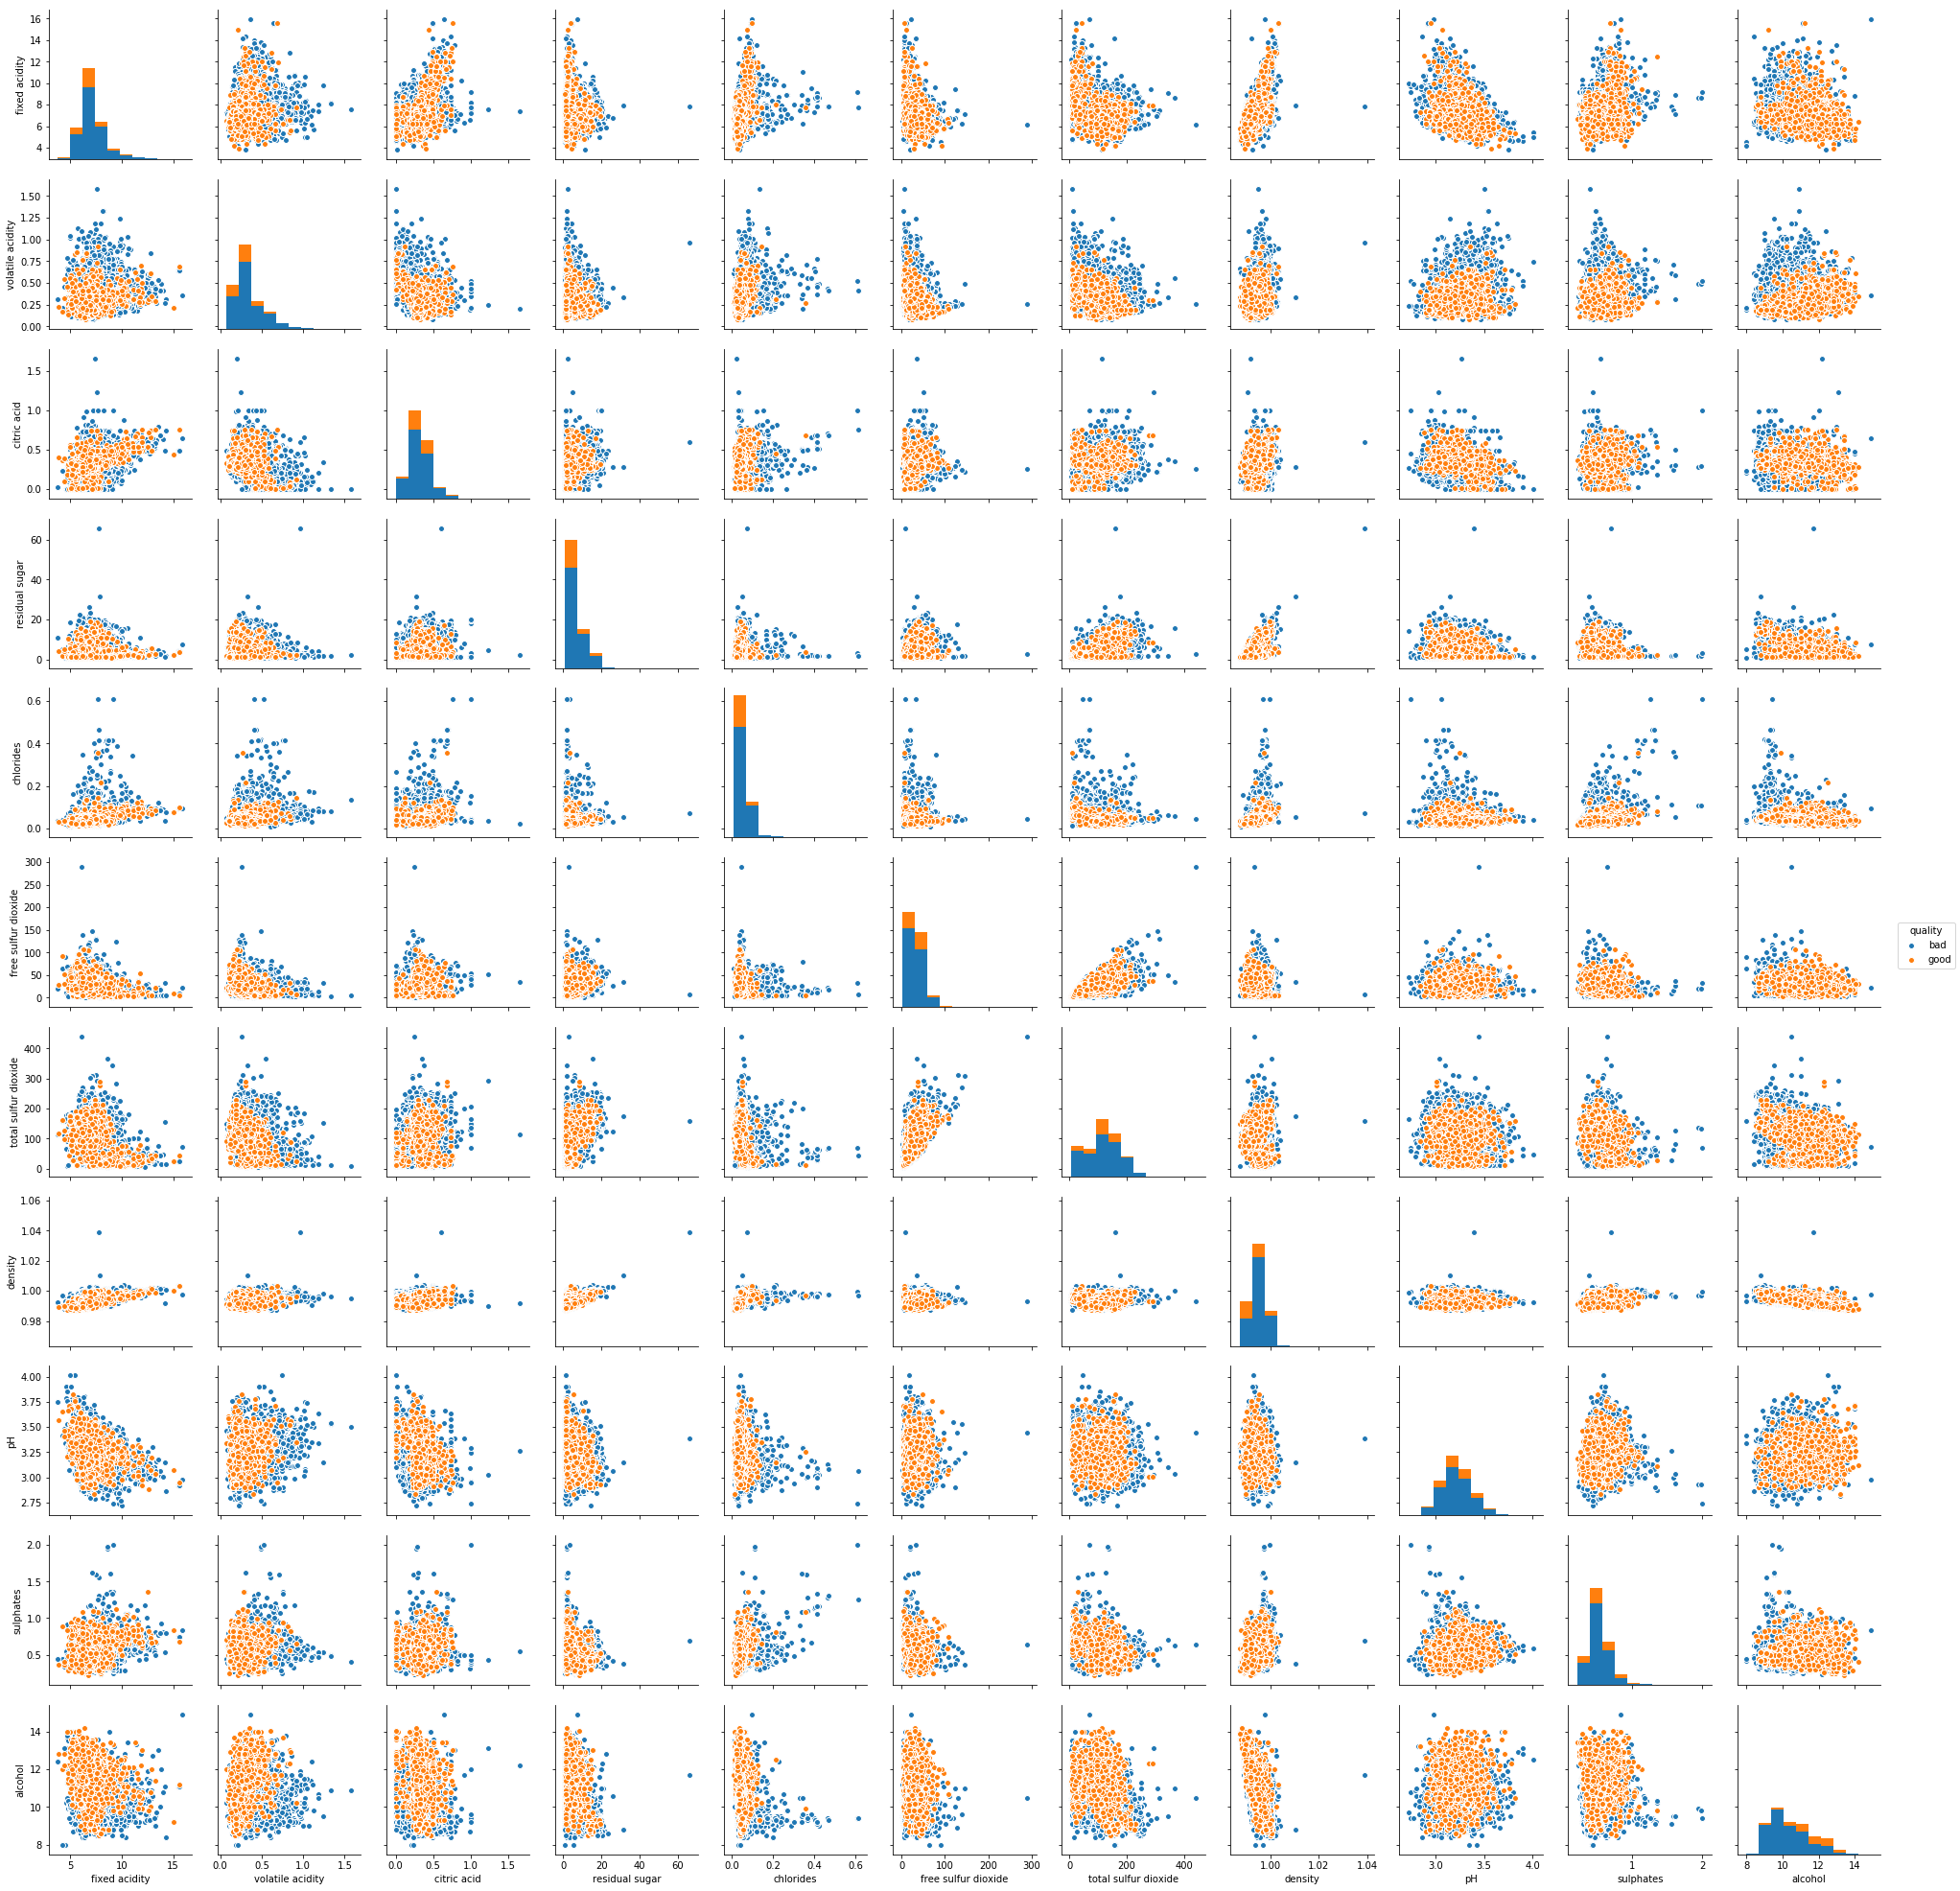

In [7]:
sb.pairplot(wine_data.dropna(), size=2.5, hue="quality")

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_data.iloc[:, :11], 
                                                    wine_data.iloc[:, 11], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [21]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3, random_state=0)
tree.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,Y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,Y_test)))

Accuracy on training set: 0.817
Accuracy on test set: 0.816


In [22]:
X_train.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [23]:
export_graphviz(tree,
                out_file='tree.odt',
                class_names=['good','bad'],
                feature_names=X_train.columns,
                filled='weathersit')

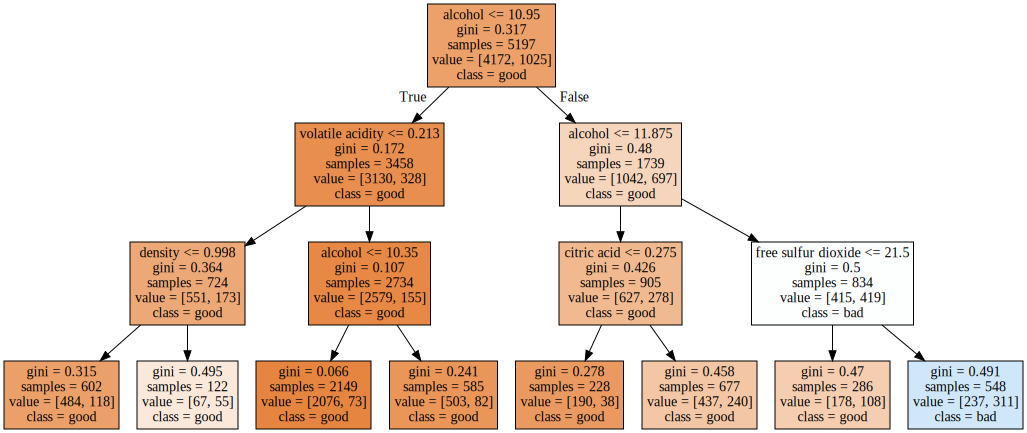

In [24]:
with open("tree.odt") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature rankings
1. feature 10 (0.170518)
2. feature 7 (0.112865)
3. feature 1 (0.084866)
4. feature 6 (0.084767)
5. feature 8 (0.084456)
6. feature 4 (0.082162)
7. feature 9 (0.079930)
8. feature 3 (0.079630)
9. feature 2 (0.077950)
10. feature 5 (0.077013)
11. feature 0 (0.065844)


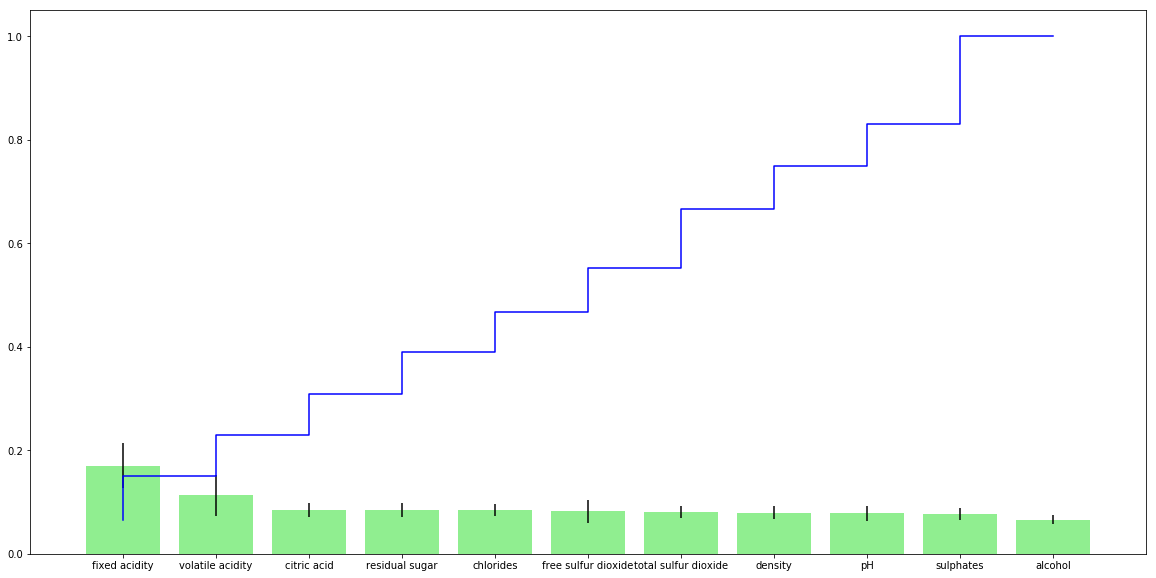

In [11]:
forest = RandomForestClassifier(n_estimators=30, random_state=0, n_jobs=-1)
forest.fit(X_train, Y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
cum_imp = np.cumsum(importances)
indices = np.argsort(importances)[::-1]

print('Feature rankings')
    
for f in range(data.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
plt.figure(figsize=(20, 10))
plt.bar(range(data.shape[1]), importances[indices], color="lightgreen", yerr=std[indices], align="center")
plt.step(range(data.shape[1]), cum_imp, 'b')
plt.xticks(range(data.shape[1]), list(wine_data.columns.values[:11]))
plt.xlim([-1, data.shape[1]])
plt.show()

In [12]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train,Y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test,Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.890
